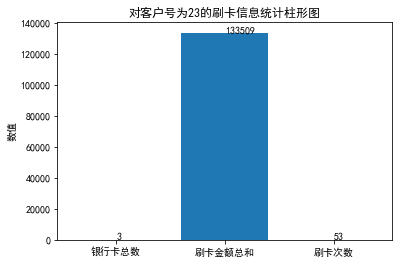

In [1]:
import pandas as pd
import numpy as np
# 交互窗口的创建
from tkinter import *
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "SimHei"  # 正常显示中文
# 窗口
from PIL import Image, ImageTk
import tkinter as tk
# 消除警告的命令
import warnings
warnings.filterwarnings("ignore")

# 打开表函数
def open_data_def():
    data_df = pd.read_csv("transactions.csv", encoding = "GBK")
    # 将列表题修改成中文的
    data_df.columns = ["客户号", "银行卡号", "刷卡金额", "刷卡时间", "卡类型"]
    # 数据清洗--检测和处理重复值
    if data_df.duplicated().sum():
        use_df = data_df.drop_duplicates()
    return use_df

# 按时间统计信息函数
def time_def(key_v2):
    use_df = open_data_def()  # 调用打开表函数
    # 统计和时间有关的数据类型
    # 1.先把时间转换为标准时间格式
    use_df["刷卡时间"] = pd.to_datetime(use_df["刷卡时间"])
    # 2.给表添加列年，月，日，时
    use_df["年"] = use_df["刷卡时间"].dt.year
    use_df["月"] = use_df["刷卡时间"].dt.month
    use_df["日"] = use_df["刷卡时间"].dt.day
    use_df["时"] = use_df["刷卡时间"].dt.hour   
    mean = use_df.loc[:,[key_v2, "刷卡金额"]].groupby(key_v2).agg({"刷卡金额":lambda x:np.round(np.mean(x),2)})
    return mean

# 按 客户号 统计信息函数
def cust_card_def(key_v2):
    use_df = open_data_def()  # 调用打开表函数
    input_v2 = int(key_v2)  # 传入界面输入的参数
    bool_v2 = use_df["客户号"] == input_v2
    ## 统计有几张银行卡
    card_count = use_df.loc[bool_v2,:]["银行卡号"].drop_duplicates().shape[0]
    ## 统计每个客户的刷卡金额总和
    amount_v2 = use_df.loc[bool_v2,:]["刷卡金额"].sum()
    ## 统计客户有多少条刷卡记录
    record_v2 = bool_v2.sum()
    return [card_count, amount_v2, record_v2]

# 对时间进行绘图函数
def time_img_def(mean, input_v2):
    # 准备数据
    x_data = mean.index
    y_data = mean["刷卡金额"].values
    # 绘制图形
    if input_v2 == "月" or input_v2 == "年":
        plt.bar(x_data, y_data)
        plt.title(f"按{input_v2}统计刷卡金额柱形图")
    else:
        plt.plot(x_data, y_data)
        plt.title(f"按{input_v2}统计刷卡金额折线图")
    plt.xticks(x_data)

    plt.xlabel(f"{input_v2}")
    plt.ylabel("金额")
    # 显示保存图形
    plt.savefig("统计图.jpg")
    
# 对客户的信息进行绘图函数
def cust_img_def(key_v2):
    x_data = ["银行卡总数","刷卡金额总和","刷卡次数"]
    y_data = cust_card_def(key_v2)  # 调用 按 客户号 统计信息函数
    # 绘制图形
    plt.bar(x_data, y_data)
    plt.xticks(x_data)
    for i in range(len(x_data)):
        plt.text(x_data[i], y_data[i], y_data[i])
    plt.title(f"对客户号为{key_v2}的刷卡信息统计柱形图")
    plt.ylabel("数值")
    # 显示保存图形
    plt.savefig("统计图.jpg")
    
def TK():
    # 获取关键字的函数
    def get_key_def():
        key_v2 = key_ent.get()  # 获取输入的关键字
        if key_v2.isdigit():
            stat_info = cust_card_def(key_v2)  # 调用按客户号统计信息函数
            out_v2 = f"客户号为 {key_v2} 的客户的统计信息：\n 银行卡总数：{stat_info[0]} 张\n 刷卡金额总和：{stat_info[1]} 元\n 刷卡次数：{stat_info[2]} 次"
        elif key_v2 in ["年","月","日","时"]:
            out_v2 = time_def(key_v2)       # 调用按时间统计信息函数
        else:
            out_v2 = " *** 输入有误 ***"
        out_txt.replace(0.0,END, out_v2)  # 用输入的关键字 替换原来的关键字

    # 绘图函数
    def img_def():
        plt.cla() # 动态绘图，清除之前的绘图

        key_v2 = key_ent.get()  # 获取输入的关键字
        if key_v2.isdigit():
            cust_img_def(key_v2)
            f = True
        elif key_v2 in ["年","月","日","时"]:
            use_df = open_data_def()  # 打开数据表
            mean = time_def(key_v2)  # 先调用 时间相关的函数 给表中添加 年月日时 列
            time_img_def(mean, key_v2)  # 调用 时间的绘图函数
            f = True
        else:
            out_v2 = " *** 输入有误 ***"
            f = False

        if f:
            win_img = tk.Toplevel()  # 声明绘图窗口
            img_v2 = ["统计图.jpg"]  # 要绘制的图形的名称
            img = Image.open(img_v2[0]).resize((864,576)) # 打开要绘制的图形
            pannel = Label(win_img)
            pannel.photo = ImageTk.PhotoImage(img)
            Label(win_img, image = pannel.photo).grid(row=1,column=1)
        else:
            out_txt.replace(0.0,END, out_v2)
    
    # 声明一个窗口对象
    win = Tk()
    win.title("银行流水统计绘图系统")
    win.geometry("600x800")
    
    # 1.添加标题标签
    title_lab = Label(win, text = "银行流水统计绘图系统", font=("黑体",20))  # 声明对象
    title_lab.place(x = 150, y = 80)      # 绘制对象

    # 2.添加提示标签（输入关键字：）
    key_lab = Label(win, text = "输入关键字：", font=("黑体",12))  # 声明对象
    key_lab.place(x = 100, y = 200)      # 绘制对象

    # 3.添加输入框
    key_ent = Entry(win, font=("宋体",12))   # 声明对象
    key_ent.place(x=220,y=200,width = 100)    # 绘制对象  一个字12

    # 4.添加按钮
    key_btn = Button(win, text="查询",font = ("黑体",12), command = get_key_def)
    key_btn.place(x=360,y=200,width = 70)

    # 4-1.添加按钮
    img_btn = Button(win, text="绘图",font = ("黑体",12), command = img_def)
    img_btn.place(x=470,y=200,width = 70)

    # 5.添加提示标签（输出内容：）
    out_lab = Label(win, text = "输出内容：", font=("黑体",12))  # 声明对象
    out_lab.place(x = 100, y = 310)      # 绘制对象

    # 6.添加文本框
    out_txt = Text(win,font = ("仿宋",15))
    out_txt.place(x=100,y=350,width=400,height=300)

    ### 文本框添加系统提示
    TS = \
    """

    本系统功能如下：

        1，可以输入“客户号”查询客

    户银行流水信息；

        2，可以查询银行的每年、每月

    、每日、每时的流水信息。
    """
    out_txt.replace(0.0,END, TS)

    # 结尾 版权
    end_lab = Label(win, text = "-- 版权 归大数据专业2102班 帅气逼人一族组 所有 --", font=("黑体",10))  # 声明对象
    end_lab.place(x = 250, y = 700)      # 绘制对象

    # 运行窗口: 此命令必须放在最后
    win.mainloop()
    
if __name__ == "__main__":
    TK()